# Teste MTC - Análise Exploratória

## Nome: Suzi Cristina Silva Campanha

## Banco Português

O conjunto de dados provém do repositório UCI repository ( http://archive.ics.uci.edu/ml/datasets/Bank+Marketing# ) e está relacionado com campanhas de marketing direto (chamadas telefônicas) de uma instituição bancária portuguesa. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

linkname = 'bank-full.csv'
dataset1 = pd.read_csv(linkname, sep = ';')

In [2]:
dataset1.shape

(45211, 17)

In [3]:
dataset1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
dataset1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Limpando o dataset
### Lidando com dados faltantes
Não existem campos nulos no dataset. Contudo, existem valores como “unknown”, “others”, que não ajudam assim como valores faltantes. Optei por remover estes valores ambiguos.

In [6]:
condition = dataset1.poutcome == 'other'
dataset2 = dataset1.drop(dataset1[condition].index, axis = 0, inplace = False)

In [7]:
dataset2[['job','education']] = dataset2[['job','education']].replace(['unknown'],'other')

## Tirando os outliners da coluna 'balance'

Para capturar a tendência geral do dataset, outliers na soluna “balance” serão removidos. Outliers são definidos como valores que estão a mais de 3 desvios padrão da média. Foram excluídas 2556 linhas.

In [9]:
from scipy.stats import zscore

dataset2[['balance']].mean()
dataset2[['balance']].mean()

dataset2['balance_outliers'] = dataset2['balance']
dataset2['balance_outliers']= zscore(dataset2['balance_outliers'])

condition1 = (dataset2['balance_outliers']>3) | (dataset2['balance_outliers']<-3 )
dataset3 = dataset2.drop(dataset2[condition1].index, axis = 0, inplace = False)

In [10]:
dataset4 = dataset3.drop('balance_outliers', axis=1)

## Transformando colunas e dados

Mudanças feitas no nome das colunas, unidades e tipos de dados para facilitar a análise.

In [12]:
# Passo 1: Mudando o nome da coluna 'y' para 'response'
dataset4.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(dataset4, new_column, old_column):
    dataset4[new_column] = dataset4[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataset4[new_column].value_counts()

convert(dataset4, "response_binary", "response")

0    37785
1     4870
Name: response_binary, dtype: int64

In [13]:
# Passo 2: Deletando a coluna "contact" que não tem importância
dataset5 = dataset4.drop('contact', axis=1)

In [14]:
# Passo 3: Mudando a unidade de 'duration' de segundo para minuto
dataset5['duration'] = dataset5['duration'].apply(lambda n:n/60).round(2)

In [15]:
# Passo 4: Mudando 'month' de palavras para números para facilitar a análise
lst = [dataset5]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

## Filtrando

In [16]:
# Passo 1: Deletar linhas cuja 'duration' < 5s
condition2 = (dataset5['duration']<5/60)
dataset6 = dataset5.drop(dataset5[condition2].index, axis = 0, inplace = False)

In [17]:
# Passo 2: Deletando valores de clientes com educação 'other'
condition3 = (dataset6['education'] == 'other')
dataset7 = dataset6.drop(dataset6[condition3].index, axis = 0, inplace = False)

# Análise exploratória de dados

## Visualizando a distribuição de 'age' e 'balance'

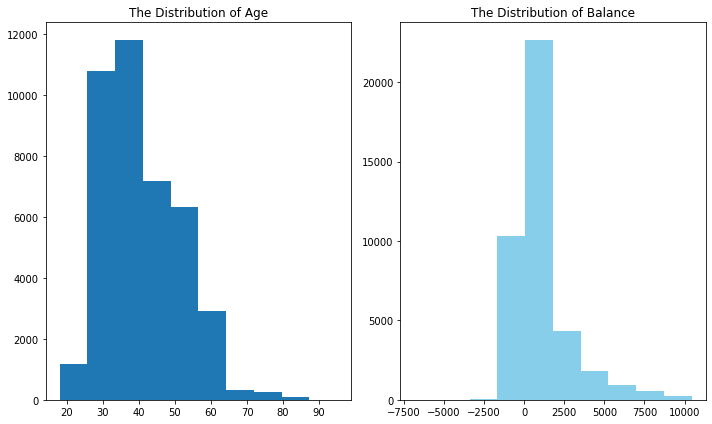

In [20]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(dataset7['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(dataset7['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout() 
plt.show()

Distribuição por idade: Nessa campanha de telemarketing, os clientes chamados tem uma variação grande de idade de 18 a 95 anos. Porém, a maioria dos clientes chamados tem por volta de 30 e 40 anos (mais precisamente de 33 a 48 anos). 

Distribuição do saldo: Depois de excluir os outliners, a variação dos saldos ainda são grandes, de um mínimo de -6847 para um máximo de 10443 euros, resultando em uma variação de 17290 euros.

### Visualizando a relação entre idade e saldo

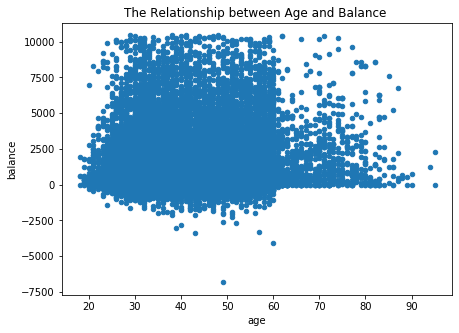

In [21]:
scatter_age_balance = dataset7.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

Baseado no gráfico, percebe-se que não há relação clara entre a idade do cliente e o nível de saldo.

### Visualizando a distribuição de duração e campanha

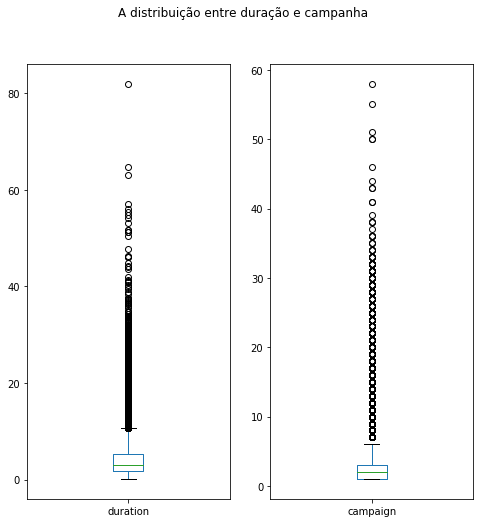

In [34]:
dist_dur_cam = dataset7[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='A distribuição entre duração e campanha')
plt.show()

Distribuição de duração: Como observado no box plot, a duração do cantato tem uma média de duração de 3 minutos, com uma variação de 1.73 minutos a 5.3 minutos. O boxplot indica que muitas das ligações são relativamente curtas. Além disso, tem um grande número de outliners en torno de 10 minutos e 40 minutos.

Distribuição das campanhas: Em torno de metade dos clientes foram contatados pelo banco uma segunda vez, enquanto 25% foram apresentados pela primeira vez ao contrato em questão. Muitos clientes foram contatados pelo banco de 1 a 3 vezes, o que é razoável. Contudo, existem alguns clientes que foram chamados mais de 58 vezes, o que não é normal. Deve haver uma razão específica para isso.

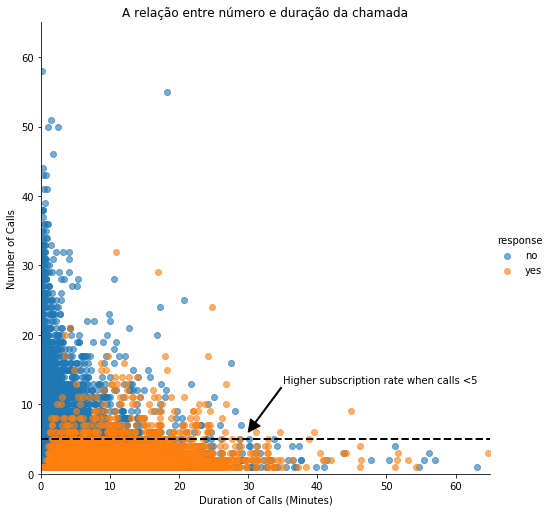

In [35]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = dataset7,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('A relação entre número e duração da chamada')

plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

Nesse gráfico de dispersão, os clientes inscritos em depósitos a prazo são denotados como "sim", enquanto aqueles não são denotados como "não".

Como podemos ver na plotagem, clientes "sim" e clientes "não" estão formando dois agrupamentos relativamente separados. Comparado aos clientes "não" ", os clientes" sim "foram contatados menos vezes e tiveram uma duração de chamada mais longa. Mais importante, após cinco chamadas de campanha, é mais provável que os clientes rejeitem o depósito a prazo, a menos que a duração seja alta. A maioria dos clientes "sim" foi abordada menos de 10 vezes.

Isso sugere que o banco deve resistir a ligar para um cliente por mais de cinco vezes, o que pode ser perturbador e aumentar a insatisfação.

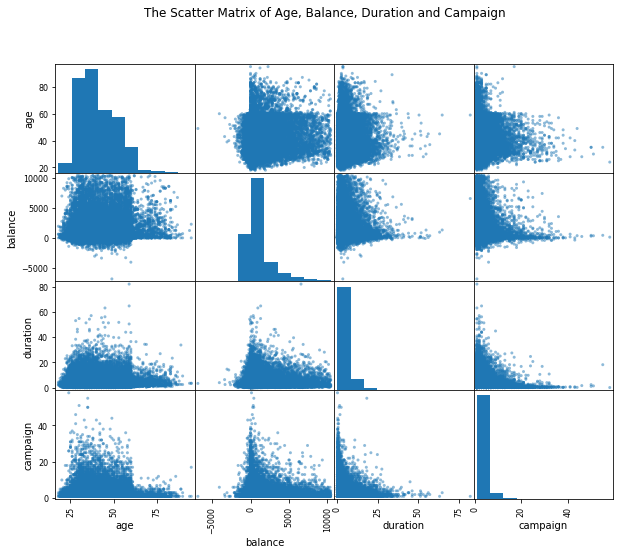

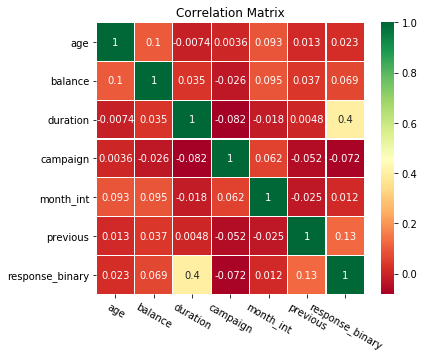

In [26]:
# Matriz de dispersão e matriz de correlação

from pandas.plotting import scatter_matrix
matrix = scatter_matrix(dataset7[['age','balance','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

corr_data = dataset7[['age','balance','duration','campaign','month_int','previous','response_binary']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

A matriz de dispersão não revela nenhuma relação clara entre idade, equilíbrio, duração e campanha.

Para investigar mais sobre correlação, uma matriz de correlação foi plotada com todas as variáveis ​​qualitativas. Claramente, "resultado da campanha" tem uma forte correlação com "duração", uma correlação moderada com "contatos anteriores" e correlações leves entre "equilíbrio", "mês de contato" e "número de campanha". Suas influências no resultado da campanha serão investigadas ainda mais na parte de aprendizado de máquina.

## Visualização de dados

Com um bom conhecimento da distribuição das variáveis-chave, análises adicionais de cada característica do cliente podem ser realizadas para investigar sua influência na taxa de assinatura.

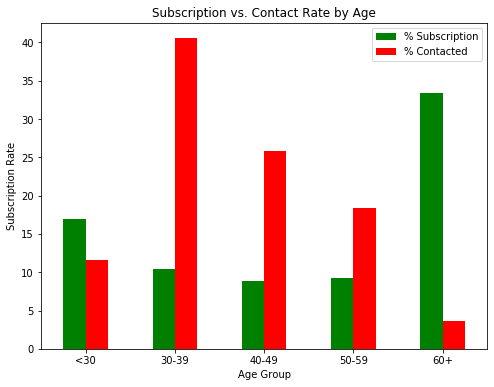

In [27]:
# Visualizando a taxa de inscrição e contato por idade

lst = [dataset7]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
count_age_response_pct = pd.crosstab(dataset7['response'],dataset7['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 
age = pd.DataFrame(dataset7['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

Informações: segmentei os mais jovens e os mais velhos, em vez da meia-idade

As barras verticais verdes indicam que os clientes com mais de 60 anos têm a maior taxa de assinatura. Aproximadamente 17% das assinaturas vieram de clientes com idades entre 18 e 29 anos. Mais de 50% das assinaturas são contribuídas pelos clientes mais jovens e pelos mais velhos.

Não é surpreendente ver esse padrão, porque o principal objetivo de investimento das pessoas mais velhas é economizar para a aposentadoria, enquanto o grupo de meia-idade tende a ser mais agressivo com o objetivo principal de gerar alta renda de investimento. Depósitos a prazo, como a ferramenta de investimento menos arriscada, são mais preferíveis aos mais velhos.
O mais novo pode não ter dinheiro ou conhecimento profissional suficiente para se envolver em investimentos sofisticados, como ações e fundos de investimento. Depósitos a prazo fornecem liquidez e geram juros mais altos do que a conta poupança regular, portanto, os depósitos a prazo são investimentos ideais para os estudantes.
No entanto, as barras verticais vermelhas mostram que o banco concentrou seus esforços de marketing no grupo de meia idade, que retornou taxas de assinatura mais baixas do que os grupos mais jovens e mais velhos. Assim, para tornar a campanha de marketing mais eficaz, o banco deve direcionar clientes mais jovens e mais velhos no futuro.

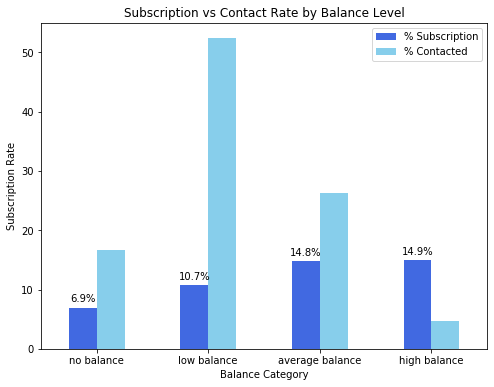

In [29]:
# Visualizando a taxa de assinatura por nível de saldo

lst = [dataset7]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'
count_balance_response_pct = pd.crosstab(dataset7['response'],dataset7['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()
bal = pd.DataFrame(dataset7['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)
plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','skyblue'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

Insights: segmentando clientes com saldo médio ou alto

Para identificar a tendência mais facilmente, os clientes são classificados em quatro grupos com base em seus níveis de equilíbrio:

Sem saldo: clientes com saldo negativo.
Saldo baixo: clientes com saldo entre 0 e 1000 euros
Saldo Médio: clientes com saldo entre 1000 e 5000 euros.
Saldo alto: clientes com saldo superior a 5000 euros.
Não é novidade que este gráfico de barras indica uma correlação positiva entre os níveis de saldo dos clientes e a taxa de assinatura. Clientes com saldos negativos retornaram apenas uma taxa de assinatura de 6,9%, enquanto clientes com saldos médios ou altos tiveram taxas de assinatura significativamente mais altas, quase 15%.

No entanto, nesta campanha, mais de 50% dos clientes contatados têm apenas um nível de saldo baixo. No futuro, o banco deve mudar seu foco de marketing para clientes de alto saldo para garantir mais depósitos a prazo.

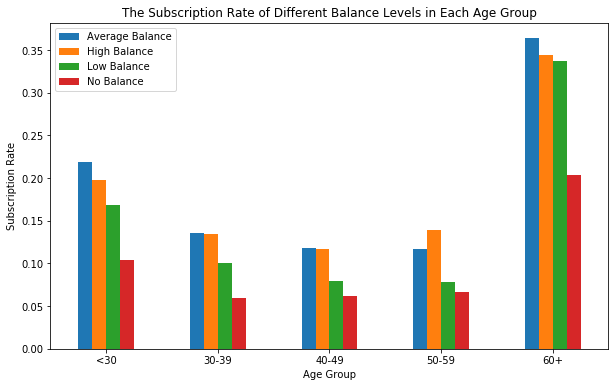

In [30]:
# Visualizando a taxa de assinatura por idade e saldo

age_balance1 = pd.DataFrame(dataset7.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(dataset7.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

Insights: segmentando clientes mais antigos com altos níveis de equilíbrio

Embora a idade represente o estágio de vida de uma pessoa e o equilíbrio represente a condição financeira de uma pessoa, a avaliação conjunta do impacto desses dois fatores nos permite investigar se existe uma tendência comum em todas as idades e identificar qual combinação de recursos do cliente indica a maior probabilidade de inscrição.

Para investigar o efeito combinado de idade e equilíbrio na decisão de um cliente, realizamos um agrupamento de duas camadas, segmentando os clientes de acordo com seus níveis de equilíbrio em cada faixa etária.

O gráfico conta a mesma história sobre a taxa de assinatura para diferentes faixas etárias: a disposição para se inscrever é excepcionalmente alta para pessoas com mais de 60 anos e pessoas com menos de 30 anos também têm uma taxa de inscrição mais alta do que as de outras faixas etárias.
Além disso, o efeito dos níveis de saldo na decisão de assinatura é aplicável a cada faixa etária individual: cada faixa etária compartilha uma tendência comum de que o percentual de assinatura aumenta com o saldo.
Em suma, o banco deve priorizar seu telemarketing para clientes acima de 60 anos e com saldo positivo, porque eles têm a maior taxa de aceitação de cerca de 35%. O próximo grupo em que o banco deve se concentrar são os clientes jovens com saldos positivos, que apresentaram altas taxas de assinatura entre 15% e 20%.

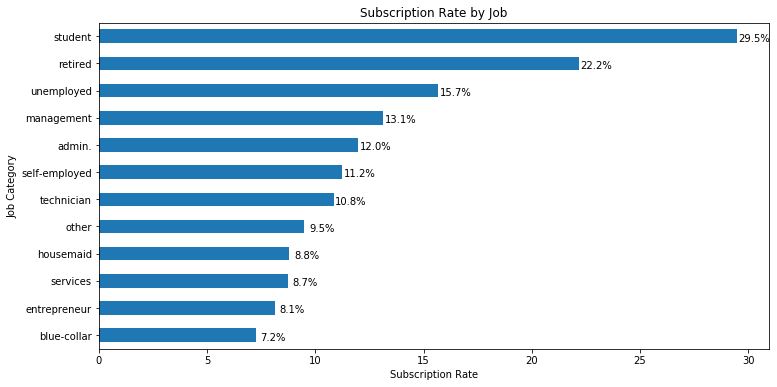

In [32]:
# Visualizando a taxa de assinatura por trabalho

count_job_response_pct = pd.crosstab(dataset7['response'],dataset7['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

Insights: segmentando alunos e clientes aposentados

Conforme observado no gráfico de barras horizontais, estudantes e clientes aposentados representam mais de 50% da assinatura, o que é consistente com a descoberta anterior de taxas de assinatura mais altas entre os mais jovens e mais velhos.

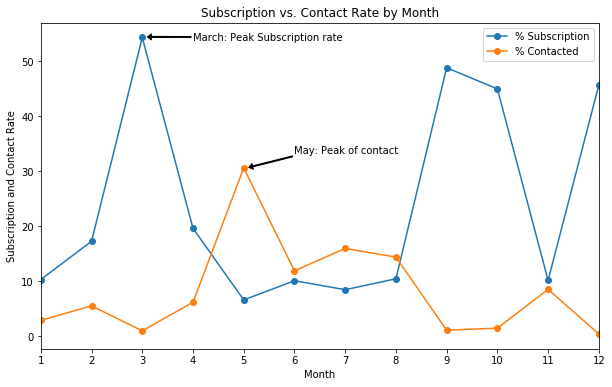

In [33]:
# Visualizando a taxa de assinatura e contato por mês

count_month_response_pct = pd.crosstab(dataset7['response'],dataset7['month_int']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(dataset7['month_int'].value_counts())
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month_int',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

Informações: iniciando a campanha de telemarketing no outono ou primavera

Além das características do cliente, fatores externos também podem afetar a taxa de assinatura, como as estações do ano e o horário da ligação. Portanto, o mês de contato também é analisado aqui.

Este gráfico de linhas exibe a taxa de contato do banco em cada mês, bem como a taxa de resposta dos clientes em cada mês. Uma maneira de avaliar a eficácia do plano de marketing do banco é verificar se essas duas linhas têm uma tendência semelhante no mesmo horizonte de tempo.

O banco entrou em contato com a maioria dos clientes entre maio e agosto. A taxa de contato mais alta é de cerca de 30%, o que ocorreu em maio, enquanto a taxa de contato é mais próxima de 0 em março, setembro, outubro e dezembro.
No entanto, a taxa de assinatura mostrou uma tendência diferente. A taxa de assinatura mais alta ocorreu em março, que é superior a 50%, e todas as taxas de assinatura em setembro, outubro e dezembro são superiores a 40%.
Claramente, essas duas linhas se movem em direções diferentes, o que indica fortemente o momento inadequado da campanha de marketing do banco. Para melhorar a campanha de marketing, o banco deve considerar iniciar a campanha de telemarketing no outono e na primavera, quando a taxa de assinatura tende a ser maior.

No entanto, o banco deve ser cauteloso ao analisar fatores externos. Mais dados da campanha de marketing anterior devem ser coletados e analisados para garantir que esse efeito sazonal seja constante ao longo do tempo e aplicável ao futuro.

In [42]:
!pip install nbconvert
import nbconvert
jupyter nbconvert --to html Teste_MTC.ipynb 

SyntaxError: invalid syntax (<ipython-input-42-1716fac757ca>, line 3)